Import Required Libraries

In [1]:
import pickle #load in dataset
import time #keep track of time
import os #traversing through directory structure
import cv2 #for reading in image arrays
import tensorflow as tf #tensorflow
from tensorflow.keras.callbacks import TensorBoard #tensorboard for graphs
from tensorflow.keras.callbacks import ModelCheckpoint #saving best models
from tensorflow.keras.callbacks import EarlyStopping #Early stopping a model if no signs of improvements
from tensorflow.keras.utils import normalize, to_categorical #normalizing image arrays and labels
from tensorflow.keras.preprocessing.image import ImageDataGenerator #data augmentation
import matplotlib.pyplot as plt #plotting graphs
import keras #DL library
import numpy as np #numpy arrays for training
from PIL import Image

Load in the dataset

In [2]:
X_train= pickle.load(open("X_train.pickle","rb"))
y_train = pickle.load(open("y_train.pickle","rb"))

Visualizing dataset and producing total count

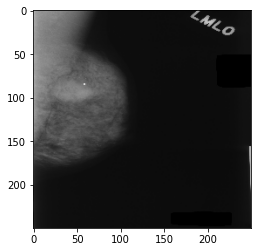

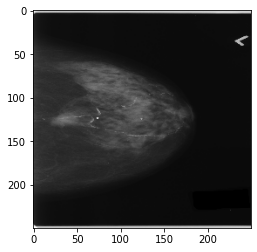

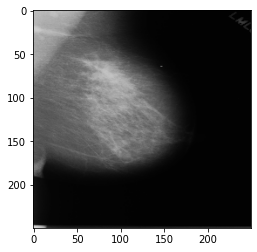

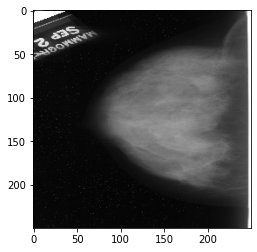

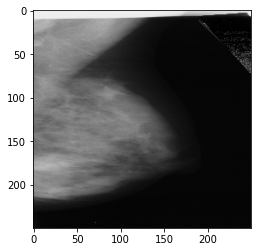

Training benigns  1122
Training Cancer 1121
Training normal 1121


In [3]:
#diplsying and counting the files
import cv2
import matplotlib.pyplot as plt
for npimage in X_train[0:5]:
    plt.imshow(npimage)
    plt.show()
num0s_TR=0
num1s_TR=0
num2s_TR=0
num0s_TE=0
num1s_TE=0
num2s_TE=0
for i in y_train:
    if i == [0]:
       num0s_TR+=1
    elif i == [1]:
        num1s_TR +=1
    elif i == [2]:
        num2s_TR +=1
    else:
        print("non classified")
# for i in y_test:
#     if i == [1,0,0]:
#        num0s_TE+=1
#     elif i == [0,1,0]:
#         num1s_TE +=1
#     elif i == [0,0,1]:
#         num2s_TE +=1
#     else:
#         print("non classified")

print ("Training benigns " ,num0s_TR )
print("Training Cancer", num1s_TR)
print("Training normal", num2s_TR)

# print ("Testing benigns " ,num0s_TE )
# print("Testing Cancer", num1s_TE)
# print("Testing normal", num2s_TE)

Normalizing the Images and Converting labels to Categorical

In [3]:
from tensorflow.keras.utils import normalize, to_categorical
X_train=X_train/255.0
y_train = to_categorical(y_train)

Defining the Data generator parameters

In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
    fill_mode='reflect',
)

Visualing Part of the Augmented Dataset

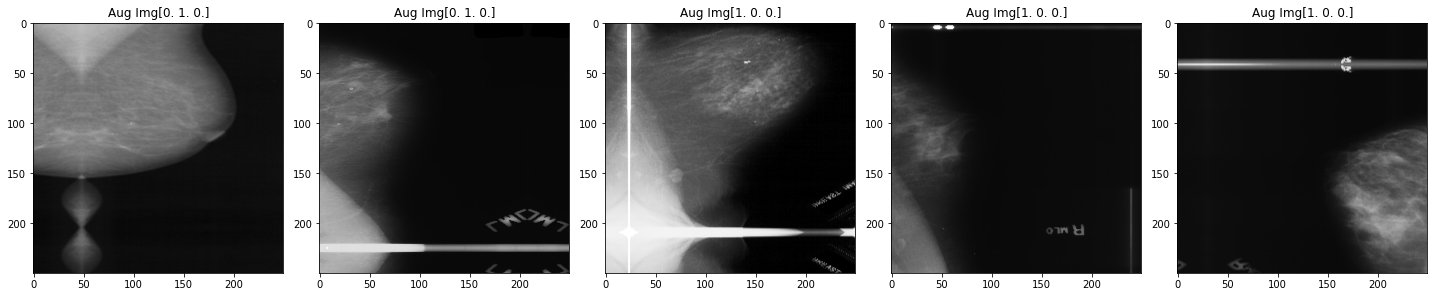

In [5]:
fig=plt.figure(figsize=(20,50))
rows = 1
columns = 5
i=0
for image,label in datagen.flow(X_train,y_train,batch_size=1):
    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[0] )
    plt.title("Aug Img"+f'{label[0]}' )
    fig.tight_layout(pad=1)
    if i==5:
        break

Defining the Model

In [6]:
#additional imports for deep layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D


NAME= "model1"
EarlyStop=EarlyStopping(patience=5,monitor='val_loss')
checkpoints=ModelCheckpoint(filepath=f'ModelCheckPoints/{NAME}.h5', verbose=1, save_best_only=True)
tensorboard = TensorBoard(log_dir='DeepModels/{}'.format(NAME))
callbacks=[EarlyStop,checkpoints,tensorboard]
model = Sequential()
model.add(Conv2D(64, (2,2), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, (2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
# model.add(Activation('sigmoid')) #for binary

Compiling the model and viewing model summary

In [ ]:
#loss="binary_crossentropy"# for binary classification
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
model.summary()

Training the Model

In [11]:
history=model.fit(datagen.flow(X_train, y_train, batch_size=20,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=12, subset='validation'),
         steps_per_epoch=len(X_train)/25 , epochs=5,callbacks=[callbacks])

Epoch 1/5
168/168 [==============================] - 54s 315ms/step - loss: 1.0869 - accuracy: 0.3770 - val_loss: 1.0806 - val_accuracy: 0.3929

Epoch 00001: val_loss improved from 1.08533 to 1.08056, saving model to ModelCheckPoints\model1_cropped_256.h5


In [ ]:
history=model.fit(X_train, y_train, batch_size=8, validation_split=0.2, epochs=15)

Plotting the Accuracy and loss graphs

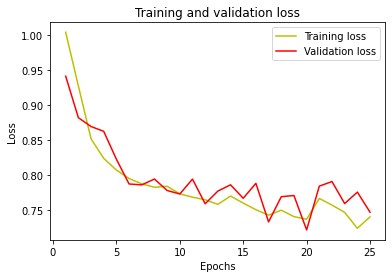

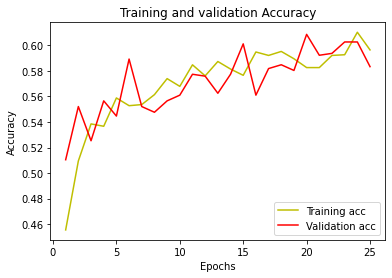

In [8]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,'y', label = "Training acc")
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title("Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Saving the Model

In [ ]:
import os
print(os.path)
model.save("C:/Users/moham/Desktop/MyDeepLearningProject/SecondModel_200_Epochs.h5")

In [2]:
import itertools

from numpy import loadtxt
from keras.models import load_model
import pickle

model = load_model('SecondModel_200_Epochs.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 249, 249, 64)      832       
_________________________________________________________________
activation (Activation)      (None, 249, 249, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 123, 123, 32)      8224      
_________________________________________________________________
activation_1 (Activation)    (None, 123, 123, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 119072)            0

In [3]:
from keras import Model
from tensorflow.keras.models import Sequential
conv_layer_index = [1, 4]  # TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 250, 250, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 249, 249, 64)      832       
_________________________________________________________________
activation (Activation)      (None, 249, 249, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 123, 123, 32)      8224      
_________________________________________________________________
activation_1 (Activation)    (None, 123, 123, 32)      0         
Total params: 9,056
Trainable params: 9,056
Non-trainable params: 0
___________________________________________________________

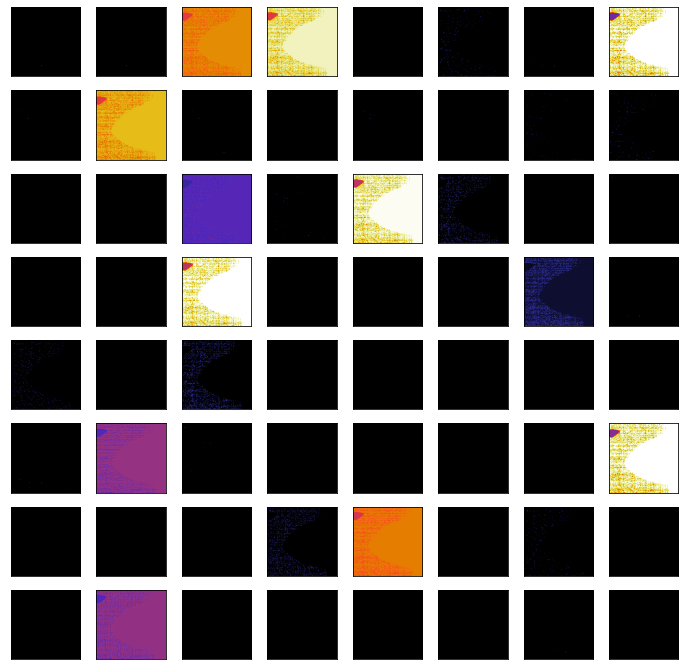

IndexError: index 32 is out of bounds for axis 3 with size 32

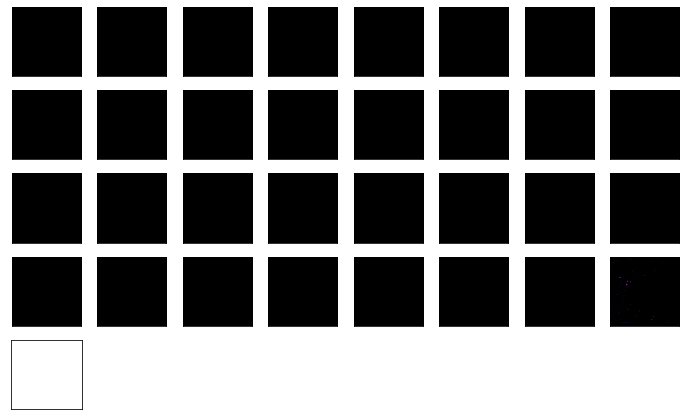

In [5]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

img = load_img('C:/Users/moham/Desktop/breast cancer dataset/Images/Benign/A_1123_1.LEFT_CC.png', target_size=(250, 250))  # VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)
img=img
# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)

columns = 8
rows = 8
for ftr in feature_output:
    # pos = 1
    fig = plt.figure(figsize=(12, 12))
    for i in range(1, columns * rows + 1):
        fig = plt.subplot(rows, columns, i)
        fig.set_xticks([])  # Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i - 1], cmap='CMRmap')
        # pos += 1
    plt.show()

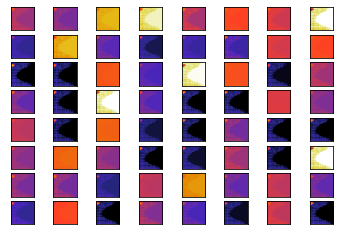

In [8]:
from keras.models import Model
from keras.preprocessing.image import load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt
layer_dict = dict([(layer.name, layer) for layer in model.layers])

layer_name = 'conv2d'

# model = Model(inputs=model.inputs, outputs=layer_dict[layer_name].output)
model_1 = Model(inputs=model.inputs, outputs=layer_dict[layer_name].output)
# Perpare the image
image = load_img('C:/Users/moham/Desktop/breast cancer dataset/Images/Benign/A_1123_1.LEFT_CC.png', target_size=(250, 250))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
# image = preprocess_input(image)
image = image/255.0
# Apply the model to the image
feature_maps = model_1.predict(image)

square = 8
index = 1
for _ in range(square):
	for _ in range(square):

		ax = plt.subplot(square, square, index)
		ax.set_xticks([])
		ax.set_yticks([])

		plt.imshow(feature_maps[0, :, :, index-1], cmap='CMRmap')
		index += 1

plt.show()